In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import clear_output
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import jieba
import seaborn as sns
import sys
import re
import os
from sklearn import feature_extraction
from glob import glob
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
from func import*
%matplotlib inline

#### 把檔案名稱中以20開頭.txt結尾的檔案存進file_list裡

In [2]:
path = './NEWS/20*.txt'
title, data = readdir(path)
title


Number of files : 83


['2015-03-06 14_31',
 '2015-03-13 16_08',
 '2015-04-17 18_02',
 '2015-05-08 15_03',
 '2015-06-08 15_04',
 '2015-06-12 16_13',
 '2015-07-13 15_29',
 '2015-08-07 14_41',
 '2015-08-12 17_27',
 '2015-08-13',
 '2015-09-09 15_09',
 '2015-09-23',
 '2015-10-06 14_47',
 '2015-10-07',
 '2015-10-13 16_49',
 '2015-10-14',
 '2015-11-05 09_58',
 '2015-11-05',
 '2015-11-10 10_27',
 '2015-12-07 15_18',
 '2015-12-08',
 '2016-02-18 16_11',
 '2016-02-19',
 '2016-03-03 16_56',
 '2016-03-14',
 '2016-04-20',
 '2016-06-02 16_58',
 '2016-06-03 10_38',
 '2016-06-03 10_49',
 '2016-08-04 14_28',
 '2016-08-08 17_22',
 '2016-08-15',
 '2016-10-06 15_16',
 '2016-11-04 17_23',
 '2016-12-05 16_09',
 '2017-01-05 15_26',
 '2017-01-06',
 '2017-02-03',
 '2017-02-08 15_44',
 '2017-02-09',
 '2017-02-10',
 '2017-03-03 18_08',
 '2017-04-11 10_41',
 '2017-04-17',
 '2017-04-20 21_06',
 '2017-06-03',
 '2017-06-21 09_46',
 '2017-06-21',
 '2017-07-05 15_03',
 '2017-07-26',
 '2017-08-01 17_28',
 '2017-08-04 12_01',
 '2017-08-18 09_

#### 處理stopword

In [3]:
stopword = readdir('./stop_words.txt')[1][0].split('\r\n')
stopwords = ['不知', '不等','不至','並且', '並未', '並稱','中央社', '中小型', '中廠', '中心', '中環', '中芯', '中資','之內', '之前', '之用', '之稅', '之路', '之際', '乾坤', '事前', '事情', '事隔', '事項','什麼', '介於', '仍將', '仍會', '仍為', '仍然','以下', '以辦','但多數', '但是', '低容', '低容質', '佐銘', '何種','三星', '三次','一位', '一天', '一年', '一提', '一槍', '一段', '一統', '一舉', '一般型', '一貫', '一陣', '一頭霧水','一一', '一併', '一個', '一倍', '一半', '一城', '一季', '一定', '一家', '一席', '一早', '一樣', '一次性', '一班', '一環', '一線']
stopword+=stopwords
#puncs_Full = '！？｡＂＃＄％＆＇（）()＊＋，－／：；＜＝＞＠［＼］$＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'
puncs_Half = "!?.#$%&'()*+,-/:;<=>@[]^_{}|~\\\""
savetofile('./stopword.txt', [stopword, puncs_Half])


Number of files : 1


In [4]:
stopword = readdir('./stopword.txt')[1][0].split('\r\n')



Number of files : 1


In [5]:
jieba.set_dictionary('./dict.txt') # 繁體字詞庫
#jieba.analyse.set_stop_words('./stopword.txt') #自訂停止詞
wordDictionary = []
for i in range(len(data)):
    seg_list = jieba.cut(data[i], cut_all=False)
    seg_list = list(seg_list)
    wordDict = {}
    for w in seg_list:
        if (w not in stopword)  and (w not in puncs_Half):
            if w in wordDict:
                wordDict[w] = wordDict[w] + 1
            else:
                wordDict[w] = 1
    wordDictionary.append(wordDict)
    #print('Number of word in document ({0}) : '.format(title[i]), len(wordDict))
    sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
    #print(sort[0:10])
    data[i] = ' '.join(jieba.cut(data[i], cut_all=False))

Building prefix dict from C:\Users\j2831\Desktop\week_6\dict.txt ...
Loading model from cache C:\Users\j2831\AppData\Local\Temp\jieba.ua1d5f39c6ae371a91e186def75f6f93e.cache
Loading model cost 1.141 seconds.
Prefix dict has been built succesfully.


In [6]:
for i in range(len(data)):
    data[i] = re.sub('[^\u4e00-\u9fff ]', '', data[i])
#[^\u4e00-\u9fff A-Za-z0-9]

In [7]:
tfidf_vectorizer = TfidfVectorizer(max_df = 1, min_df = 0, analyzer = 'word'
                                   , stop_words = stopword, max_features = 10000)
#print(tfidf_vectorizer.get_stop_words())

In [8]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data)
#print(tfidf_matrix.shape)

In [9]:
words = tfidf_vectorizer.get_feature_names()
#print(words[0:50])
#print(words)

In [10]:
data = pd.DataFrame(tfidf_matrix.toarray().T, index = words, columns = title)
data=pd.DataFrame(np.transpose(np.array(data)))
#data=data.T
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.353553,0.353553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data.values)
data_std

array([[-0.11043153, -0.11043153, -0.11043153, ..., -0.11043153,
        -0.11043153, -0.11043153],
       [-0.11043153, -0.11043153, -0.11043153, ..., -0.11043153,
        -0.11043153, -0.11043153],
       [-0.11043153,  9.05538514,  9.05538514, ..., -0.11043153,
        -0.11043153, -0.11043153],
       ...,
       [-0.11043153, -0.11043153, -0.11043153, ..., -0.11043153,
        -0.11043153, -0.11043153],
       [-0.11043153, -0.11043153, -0.11043153, ..., -0.11043153,
        -0.11043153, -0.11043153],
       [-0.11043153, -0.11043153, -0.11043153, ..., -0.11043153,
        -0.11043153, -0.11043153]])

In [12]:
pca = PCA(n_components=7)
x_7d = pca.fit_transform(data_std)
print(x_7d.shape)
print(x_7d)

(83, 7)
[[-7.32775756e-01 -6.45068729e-01 -5.06286926e-01 -5.61030464e-01
  -4.22432487e-01 -2.48441752e-03 -8.18675429e-01]
 [-7.53620315e-01 -6.67531446e-01 -5.27221432e-01 -5.85723762e-01
  -4.42882157e-01 -2.77433182e-03 -8.60519922e-01]
 [-7.99085034e-01 -7.17498770e-01 -5.74839143e-01 -6.42254974e-01
  -4.90728780e-01 -3.74077817e-03 -9.58371756e-01]
 [-7.13053817e-01 -6.24069434e-01 -4.86963377e-01 -5.38341010e-01
  -4.03817492e-01 -2.25428771e-03 -7.80708117e-01]
 [-7.13053817e-01 -6.24069434e-01 -4.86963377e-01 -5.38341010e-01
  -4.03817492e-01 -2.25428771e-03 -7.80708117e-01]
 [-7.75686513e-01 -6.91616433e-01 -5.49983780e-01 -6.12701583e-01
  -4.65477551e-01 -3.16198612e-03 -9.06861474e-01]
 [-7.13053817e-01 -6.24069434e-01 -4.86963377e-01 -5.38341010e-01
  -4.03817492e-01 -2.25428771e-03 -7.80708117e-01]
 [-7.13053817e-01 -6.24069434e-01 -4.86963377e-01 -5.38341010e-01
  -4.03817492e-01 -2.25428771e-03 -7.80708117e-01]
 [-7.87211261e-01 -7.04320770e-01 -5.62128545e-01 -6.271

In [13]:
pca4 = PCA(n_components=4)
x_4d = pca.fit_transform(data_std)
x_4d.shape

(83, 7)

In [17]:
#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 2)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_4d)
#for i in range(0,82,3):
    #X_clustered[i]=1
    #continue
X_clustered[44]=1
X_clustered[73]=1
X_clustered[37]=1
X_clustered[69]=1
X_clustered[66]=1
X_clustered[40]=1
X_clustered[58]=0
LABEL_COLOR_MAP = {0:'r', 1: 'g'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

0
1


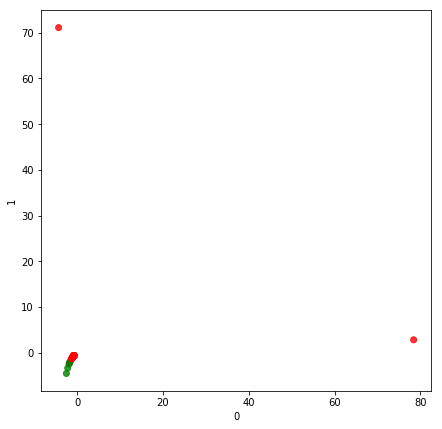

0
2


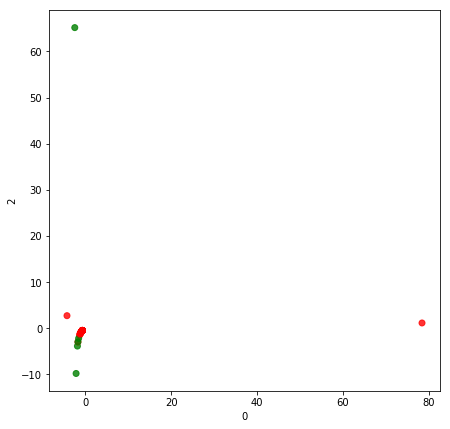

0
3


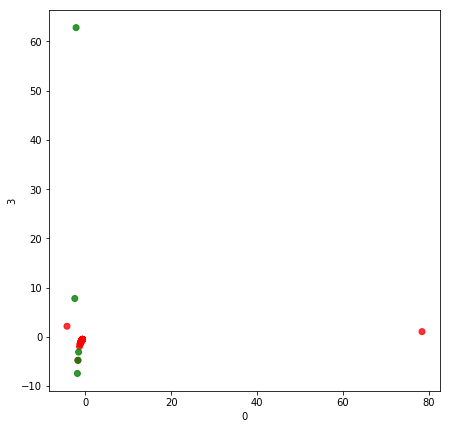

0
4


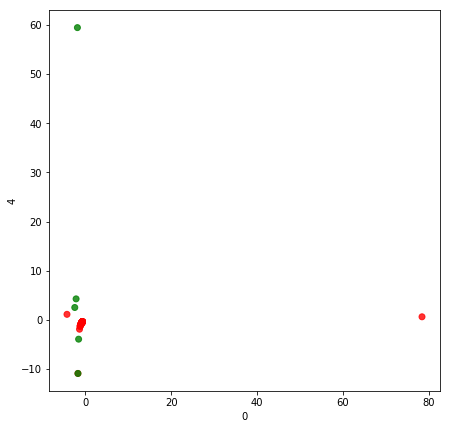

0
5


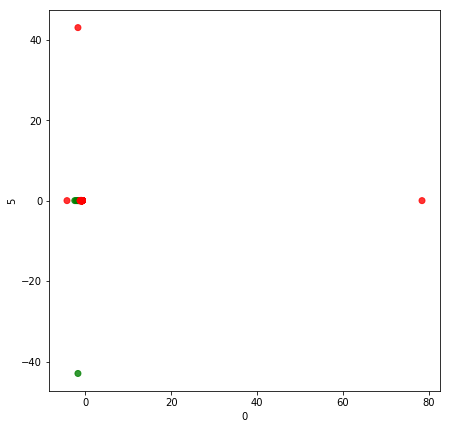

0
6


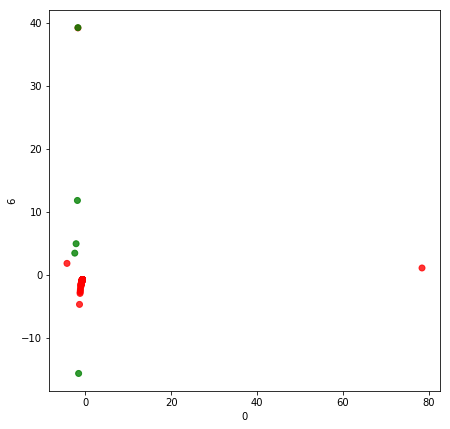

1
2


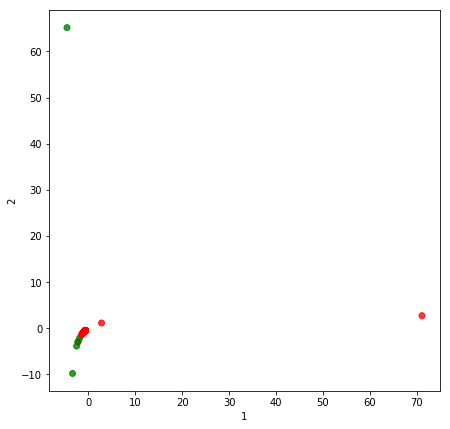

1
3


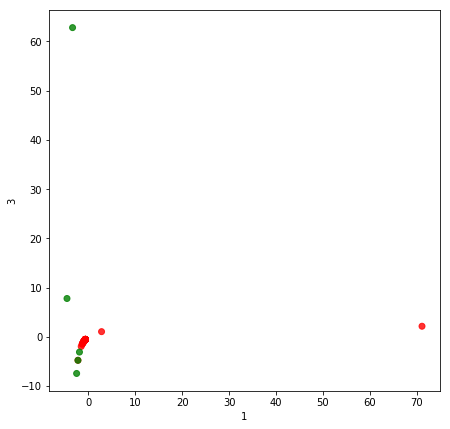

1
4


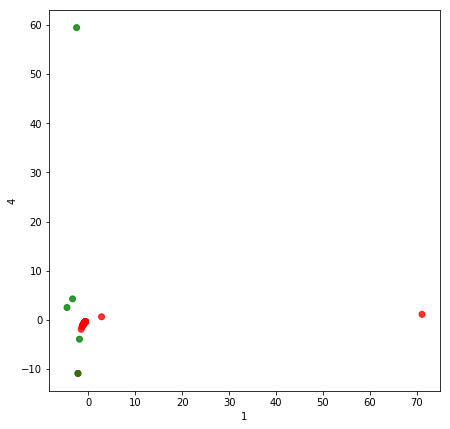

1
5


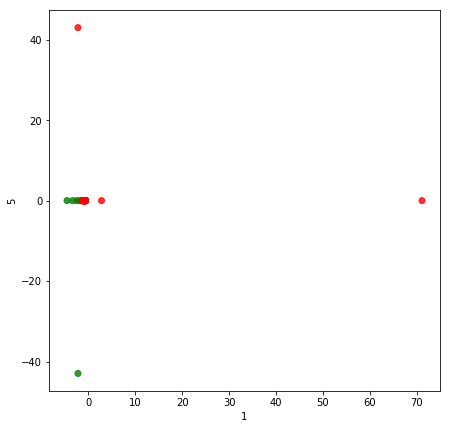

1
6


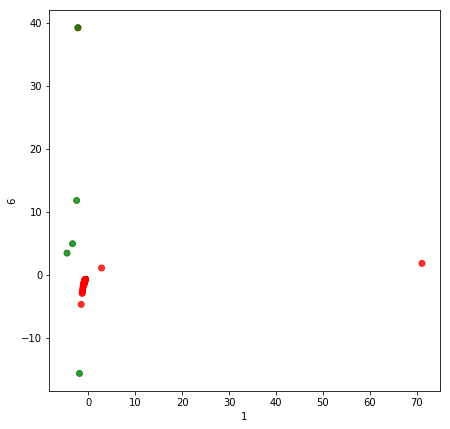

2
3


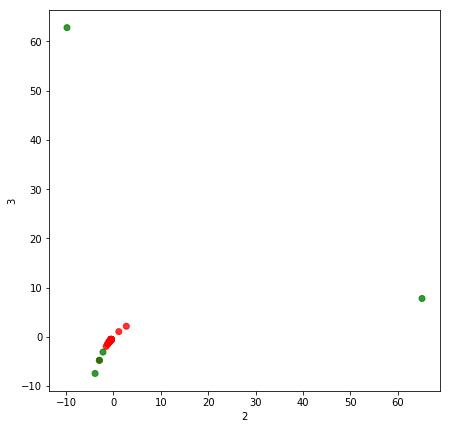

2
4


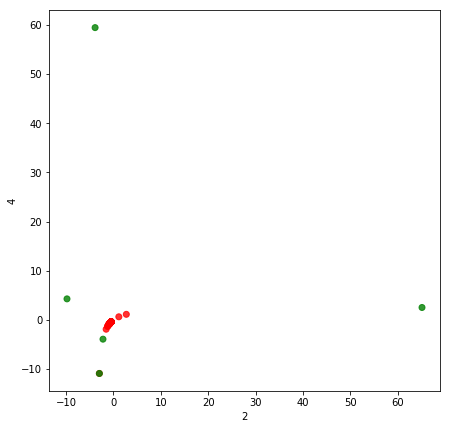

2
5


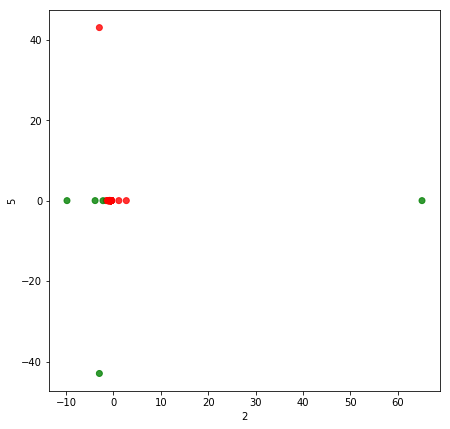

2
6


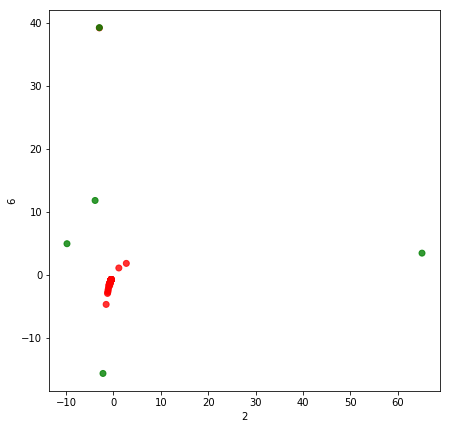

3
4


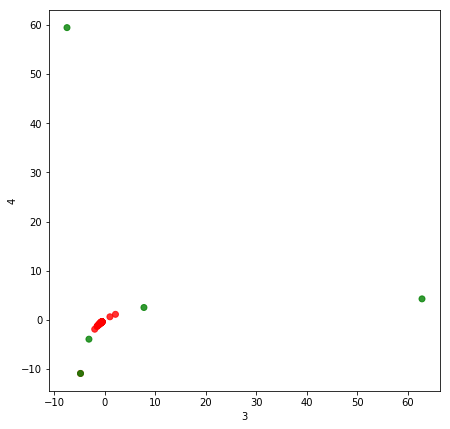

3
5


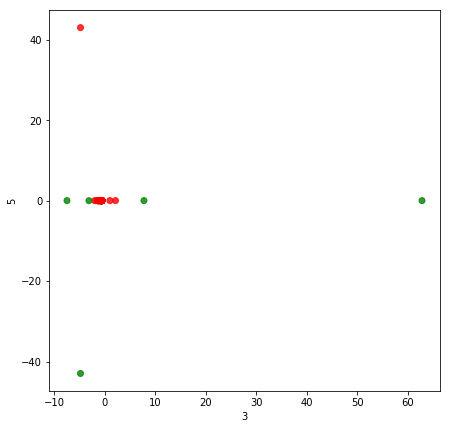

3
6


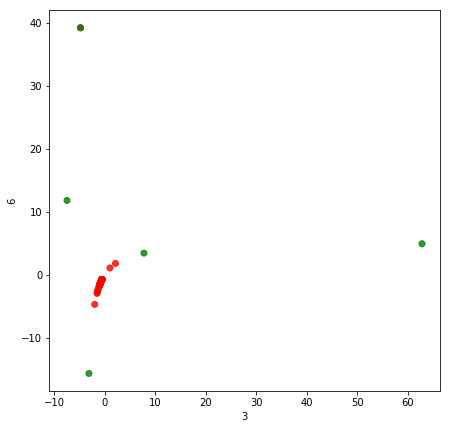

4
5


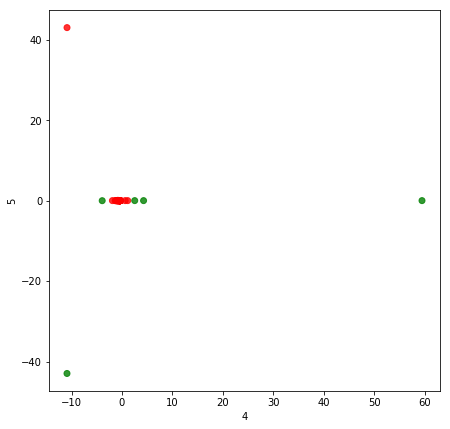

4
6


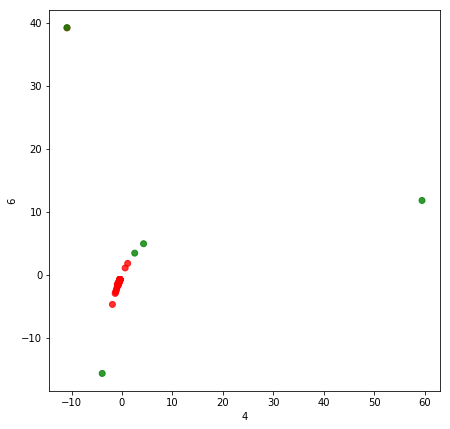

5
6


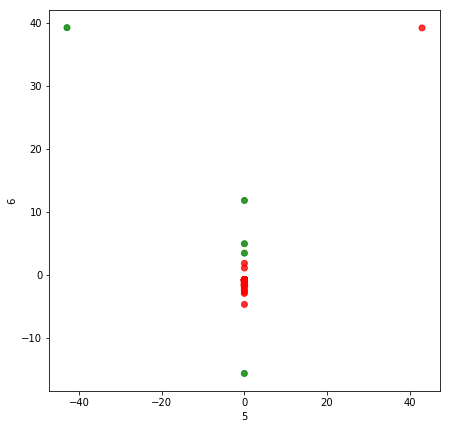

In [18]:
f=7
for i in range(f):
    for j in range(i,f):
        if(i==j):
            continue
        plt.figure(figsize = (7,7))
        print(i)
        print(j)
        plt.scatter(x_4d[:,i],x_4d[:,j], c= label_color, alpha=0.8) 
        plt.xlabel(i)
        plt.ylabel(j)
        plt.show()

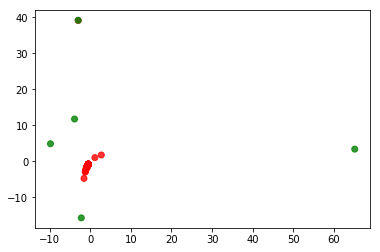

In [19]:
#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.scatter(x_4d[:,2],x_4d[:,6], c= label_color, alpha=0.8) 
plt.show()

In [20]:
import plotly
plotly.tools.set_credentials_file(username='hank421.chen', api_key='A8OTqDBMym0e6rQjNe8I')

In [21]:
import plotly.plotly as py
import plotly.graph_objs as go

In [22]:
x_4d[:,3]

array([-0.55927468, -0.58377735, -0.63982973, -0.53674149, -0.53674149,
       -0.61051609, -0.53674149, -0.53674149, -0.62481167, -0.53674149,
       -0.53674149, -0.7268213 , -0.53674149, -0.57126418, -0.53674149,
       -0.53674149, -0.54777694, -0.53674149, -0.57126418, -0.53674149,
       -0.65553888, -0.53674149, -0.53674149, -0.53674149, -1.03902871,
       -0.65554145, -0.61051699, -0.84309755, -1.01138703, -0.53674149,
       -0.53674149, -0.70783835, -0.53674149, -0.53674149, -0.53674149,
       -0.53674149, -0.6555506 , -7.4489907 , -0.70782671, -1.96155146,
        7.77817681, -0.58377732, -0.63980772, -1.36245439, -0.54777694,
       -4.77580852, -0.55927468, -0.67184169, -0.65548546, -1.04487362,
       -0.55927468, -0.54777694, -0.74841211, -0.96327989, -0.7862689 ,
       -0.54777694, -0.57126419, -0.7701529 ,  1.04731332, -0.62481562,
       -0.99998153, -0.55927468, -0.83982887, -0.86215004, -0.63980837,
       -0.88716275, -3.10552031, -1.18146939, -0.83681793, 62.80

In [23]:
x_4d[:,0]

array([-0.7327202 , -0.75355832, -0.79900347, -0.71300344, -0.71300344,
       -0.77561622, -0.71300344, -0.71300344, -0.7871371 , -0.71300344,
       -0.71300344, -0.86412919, -0.71300344, -0.7429932 , -0.71300344,
       -0.71300344, -0.72272738, -0.71300344, -0.7429932 , -0.71300344,
       -0.81122839, -0.71300344, -0.71300344, -0.71300344, -1.05363111,
       -0.81123048, -0.77561607, -0.94144829, -1.01003267, -0.71300344,
       -0.71300344, -0.85028529, -0.71300344, -0.71300344, -0.71300344,
       -0.71300344, -0.81123651, -1.87093383, -0.85030089, -1.38282483,
       -2.48510623, -0.75355831, -0.79900354, -1.19555291, -0.72272738,
       -1.74757496, -0.7327202 , -0.82384191, -0.81124028, -1.0528699 ,
       -0.7327202 , -0.72272738, -0.87838363, -1.01312287, -0.90887248,
       -0.72272738, -0.7429932 , -0.89322244, 78.41435983, -0.78713683,
       -1.03286802, -0.7327202 , -0.94090637, -0.9575098 , -0.79900397,
       -0.95814193, -1.59021914, -1.11962141, -0.94235219, -2.17

In [24]:
import plotly.plotly as py
import plotly.graph_objs as go
x1=x_4d[:,2]
x1=x1[:24]
y1=x_4d[:,6]
y1=y1[:24]

x2=x_4d[:,2]
x2=x2[25:51]
y2=x_4d[:,6]
y2=y2[25:51]

x3=x_4d[:,2]
x3=x3[51:]
y3=x_4d[:,6]
y3=y3[51:]


In [25]:
time0 = go.Scatter(
    #x=x_4d[:,2],
    #y=x_4d[:,6],
    x=x1,
    y=y1,
    mode="markers",
    text=title,
    hoverinfo='text'
)
time1 = go.Scatter(
    #x=x_4d[:,2],
    #y=x_4d[:,6],
    x=x2,
    y=y2,
    mode="markers",
    text=title,
    hoverinfo='text'
)
time2 = go.Scatter(
    #x=x_4d[:,2],
    #y=x_4d[:,6],
    x=x3,
    y=y3,
    mode="markers",
    text=title,
    hoverinfo='text'
)

data = [time0,time1,time2]

py.iplot(data, filename = 'basic-line')